In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sympy as sym  # for computing the partial derivatives

In [3]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 1. Defining 2D function 

In [20]:
def peaks(x,y):
    
    # expanding to 2D mesh
    x,y = np.meshgrid(x,y)
    
    z = 3*(1-x)**2*np.exp(-(x**2) - (y+1)**2) \
        -10*(x/5 - x**3 -y**5)*np.exp(-x**2 - y**2) \
        -1/3*np.exp(-(x+1)**2 - y**2)
    
    return z

#### Testing

In [21]:
np.meshgrid([1,2,3,4] , [5,6,7])

[array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]),
 array([[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7]])]

In [22]:
peaks(x = [1,2,3,4]  , y = [5,6,7])

array([[1.59699820e-07, 7.96828645e-09, 5.40121101e-11, 4.98278106e-14],
       [6.63597906e-12, 3.30674892e-13, 2.23345149e-15, 2.04624997e-18],
       [3.24180385e-17, 1.61465222e-18, 1.08916052e-20, 9.95357074e-24]])

### 2. Creating a landscape

In [23]:
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

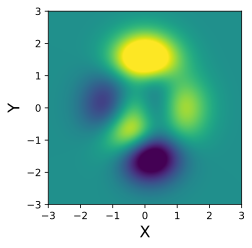

In [24]:
plt.figure(figsize = (3.5,3.5) , dpi = 130)
plt.imshow(Z,extent = [x[0],x[-1],y[0],y[-1]] , vmin = -5 , vmax = 5 , origin = 'lower')
plt.xlabel("X" , fontsize = 16)
plt.ylabel("Y" , fontsize = 16)

plt.show()

### 3. Finding Gradient using Sympy


    The lambdify function translates SymPy expressions into 
    Python functions(lambda Function).

    First argument to lambdify() function is a list of variables, 
    followed by the expression to be evaluated.

    Example (i):

    expr=a**2+b**2 

    f=lambdify([a,b],expr) 

    f(2,3)

    Example (ii):

    lambdify([a,b],expr, "numpy") 

    To leverage numpy library as numerical backend, we have to define 
    the same as an argument for lambdify() function.



In [25]:
sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2*sym.exp(-(sx**2) - (sy+1)**2) \
        -10*(sx/5 - sx**3 -sy**5)*sym.exp(-sx**2 - sy**2) \
        -1/3*sym.exp(-(sx+1)**2 - sy**2)

# Create functions from sympy-computed derivatives
df_x = sym.lambdify((sx,sy) , sym.diff(sZ,sx) , 'sympy')
df_y = sym.lambdify((sx,sy) , sym.diff(sZ,sy) , 'sympy')

df_x(1,1).evalf()

-1.07369833656079

### 4. Finding Local Minimum using Iteration

In [8]:
# Random starting point (uniform between -2 and +2) 
localmin = np.random.rand(2)*4 - 2 
startpnt = localmin[:]

# Learning Parameters
learning_rate = 0.01
training_epochs = 1000

# Run through training
trajectory = np.zeros((training_epochs,2))

for i in range(training_epochs):
    
    grad = np.array([df_x(localmin[0] ,localmin[1]).evalf(),
                     df_y(localmin[0] , localmin[1]).evalf()
                    ])
    
    localmin = localmin -learning_rate*grad
    trajectory[i,:] = localmin
    
print("Start Point : " ,startpnt)
print("Final Point : ",localmin)

Start Point :  [ 1.91532308 -1.82650433]
Final Point :  [0.228278920556369 -1.62553495750000]


### 5. Plotting the Minima on the function graph

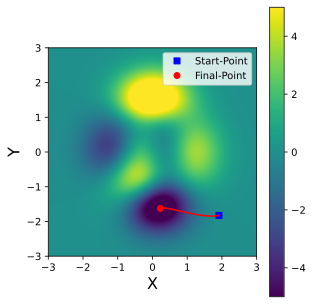

In [32]:
plt.figure(figsize = (4.5,4.5) , dpi = 130)

plt.imshow(Z,extent = [x[0],x[-1],y[0],y[-1]] , vmin = -5 , vmax = 5 , origin = 'lower')
plt.plot(startpnt[0] ,startpnt[1] ,'bs' , label = "Start-Point")
plt.plot(localmin[0] ,localmin[1] ,'ro' , label = "Final-Point")

plt.plot(trajectory[:,0] ,trajectory[:,1] , 'r')
plt.legend()

plt.colorbar()


plt.xlabel("X" , fontsize = 16)
plt.ylabel("Y" , fontsize = 16)
plt.tight_layout()
plt.show()